In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv("clean_data.csv")

In [3]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,age_house,renovated
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,59,0.0
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,63,1.0
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,...,1933,0.0,98028,47.7379,-122.233,2720,8062,2015,82,0.0
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,49,0.0
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,28,0.0


To clean the data set furtther we need to remove the outliers for sqft_lot and sqft_living so we can have a good predicting model for our prices during Linear Regression.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21596 entries, 0 to 21595
Data columns (total 25 columns):
Unnamed: 0       21596 non-null int64
id               21596 non-null int64
date             21596 non-null object
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       21596 non-null float64
view             21596 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null float64
yr_built         21596 non-null int64
yr_renovated     21596 non-null float64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
year_sold        21596 non-null int6

This indicates that our data has 21596 data points in the data set to work with and feed into our linear regression model

For our regression model, we are interested in factors that can predict price accurately and have a high correlation with regards to price but also avoiding multicollinearity between the variables.

In [5]:
df4 = df # storing the dataframe in another variable for the purpose of linear regression.

In [6]:
df4.corr()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,age_house,renovated
Unnamed: 0,1.000000,0.006722,0.027426,0.009046,0.107077,0.044894,-0.027173,0.180067,-0.007699,-0.013368,...,0.199891,-0.021752,-0.002076,0.000752,0.008830,0.026728,-0.030300,-0.001492,-0.199901,-0.021763
id,0.006722,1.000000,-0.016763,0.002328,0.005145,-0.012258,-0.131920,0.018576,-0.003602,0.011762,...,0.021589,-0.010619,-0.008195,-0.001766,0.020643,-0.002734,-0.138570,0.009891,-0.021430,-0.010628
price,0.027426,-0.016763,1.000000,0.315961,0.525915,0.701929,0.089879,0.256820,0.264308,0.393502,...,0.053965,0.117858,-0.053409,0.306687,0.022047,0.585267,0.082849,0.003736,-0.053901,0.117546
bedrooms,0.009046,0.002328,0.315961,1.000000,0.527870,0.593178,0.033602,0.183707,-0.002054,0.080741,...,0.160736,0.018626,-0.158588,-0.011595,0.136561,0.404532,0.031892,-0.009146,-0.160870,0.018354
bathrooms,0.107077,0.005145,0.525915,0.527870,1.000000,0.755755,0.088368,0.502574,0.063628,0.186011,...,0.507166,0.047173,-0.204778,0.024301,0.224889,0.569878,0.088297,-0.026592,-0.507553,0.046738
sqft_living,0.044894,-0.012258,0.701929,0.593178,0.755755,1.000000,0.173449,0.353941,0.104635,0.281710,...,0.318140,0.051056,-0.199793,0.052178,0.241200,0.756400,0.184337,-0.029031,-0.318580,0.050825
sqft_lot,-0.027173,-0.131920,0.089879,0.033602,0.088368,0.173449,1.000000,-0.004824,0.021458,0.075052,...,0.052939,0.004977,-0.129582,-0.085507,0.230222,0.144756,0.718203,0.005621,-0.052846,0.005089
floors,0.180067,0.018576,0.256820,0.183707,0.502574,0.353941,-0.004824,1.000000,0.020794,0.028401,...,0.489175,0.003785,-0.059522,0.049280,0.125912,0.280072,-0.010734,-0.022382,-0.489497,0.003705
waterfront,-0.007699,-0.003602,0.264308,-0.002054,0.063628,0.104635,0.021458,0.020794,1.000000,0.380543,...,-0.024491,0.073938,0.028925,-0.012154,-0.037632,0.083822,0.030657,-0.005021,0.024409,0.074267
view,-0.013368,0.011762,0.393502,0.080741,0.186011,0.281710,0.075052,0.028401,0.380543,1.000000,...,-0.054464,0.090337,0.085066,0.006334,-0.077715,0.278921,0.073079,0.001229,0.054480,0.090478


Based on the above table and our earlier EDA, we can determine that the best factors that can predict price are Grade, Square foot living,Square foot above, Square foot living of the nearest 15 neighbours and possibly bathrooms.
Because square living is a function of square foot above , this will cause multicollinearity error in our model,so we won't continue with this predictor variable

Determining our Categorical and Non-categorical factors/variables.

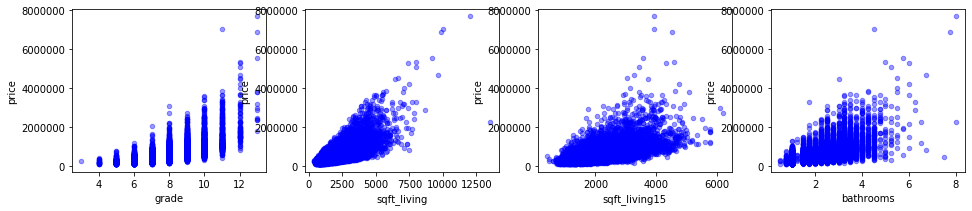

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['grade', 'sqft_living', 'sqft_living15','bathrooms'], axes):
    df4.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

From our initial assesment it seems that grade and bathrooms variables are categorical variables as the values are not continuous

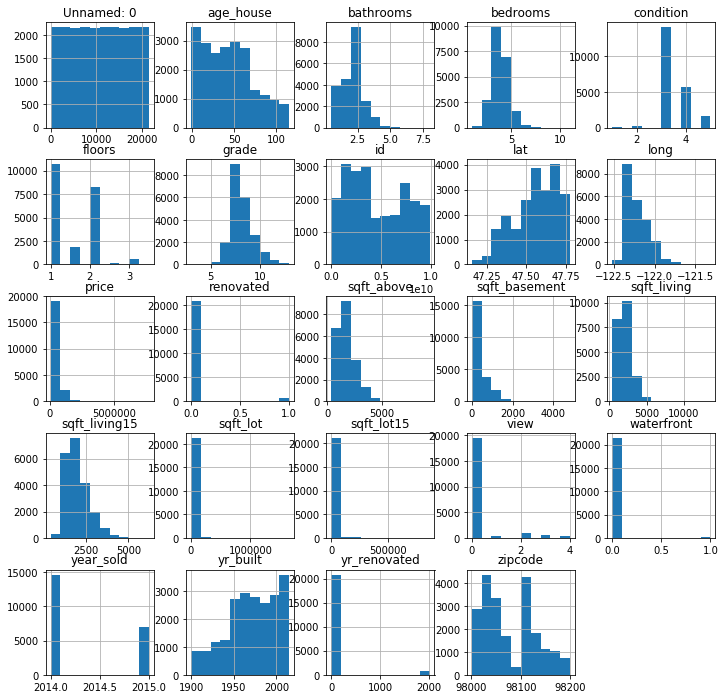

In [8]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
df4.hist(ax = ax);

Some of the varaiables we are interested in are not normally distributed - price, squarefoot living and square foot living of the nearest 15 neighbours

To transform the variables into normally distributed variables, we will use the log transformations.

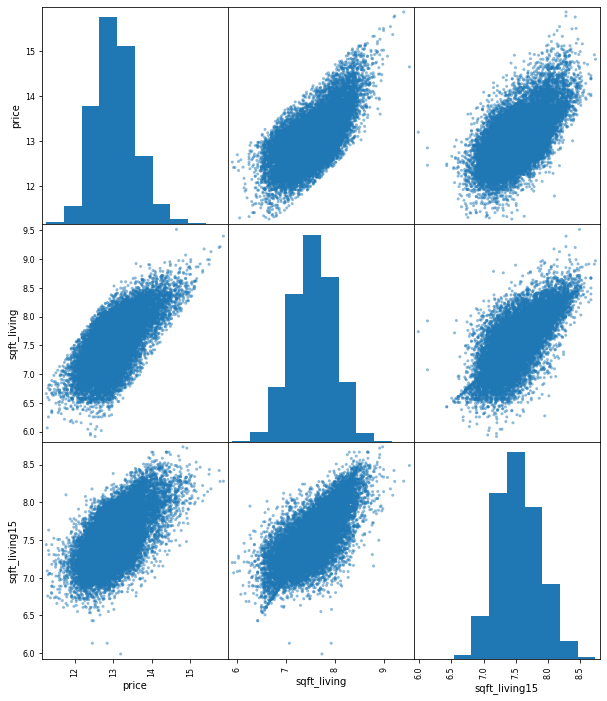

In [9]:
non_normal = ['price','sqft_living', 'sqft_living15']
for feat in non_normal:
    df4[feat] = df4[feat].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(df4[non_normal], figsize=(10,12));

The above plot suggests that the skewed data has approximately conformed to normality. If the original data follows a log-normal distribution or approximately so, then the log-transformed data follows a normal or near normal distribution.

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [11]:
outcome = 'price'
x_cols = ['sqft_living']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.806e+04
Date:                Wed, 23 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:33:17   Log-Likelihood:                -10230.
No. Observations:               21596   AIC:                         2.046e+04
Df Residuals:                   21594   BIC:                         2.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.7232      0.047    142.609      0.000       6.631       6.816
sqft_living     0.8377      0.006    134.372      0.000       0.825       0.850
==============================================================================
Omnibus:                      123.586   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.131
Skew:                           0.143   Prob(JB):                     1.65e-25
Kurtosis:                       2.788   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R^2 value for the sqft_living is 0.455. There is no multicollinearity error in the linear regression model and the values for skew and kurtosis are lower than the standard 0.5 for skew and 3 for kurtosis regarding a normal distribution.
Displaying the qq plot below to check for the normality.

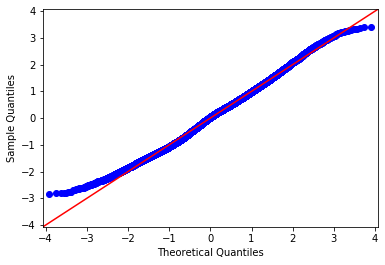

In [12]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

The Q-Q plot does not show a lot of deviation when checking for normailty in the residual errors. The plot below sheds more insight into each of our factors used in predicting price.

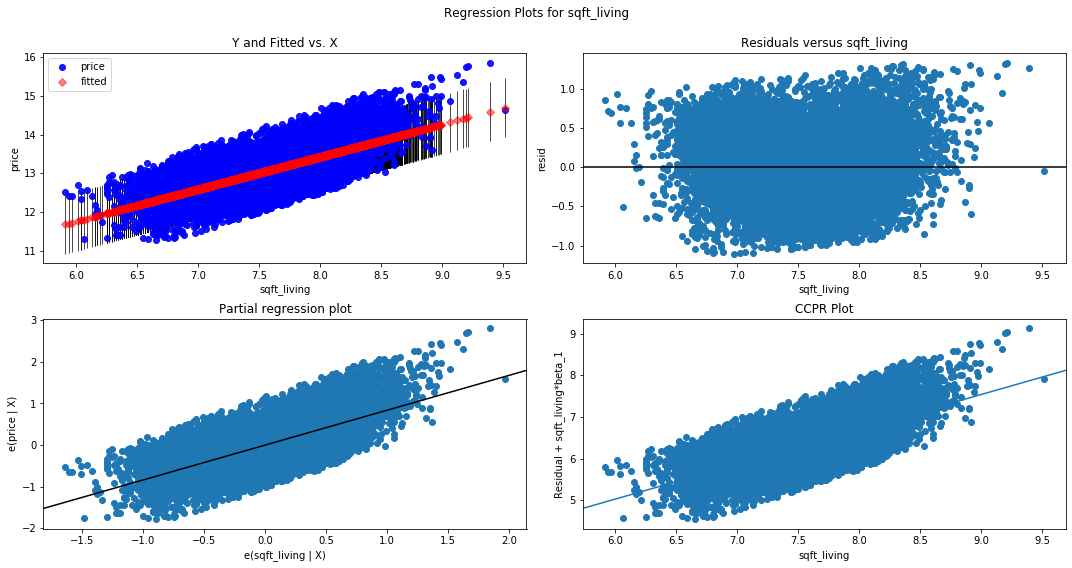

In [14]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

The Y vs X plot shows there is positive linear relationship between the price and sqft_living.

The residuals of sqft_living shows that there is no pattern between the distance of the observed values(dots) and the mean(line)

The next step at this point is to get the best predictor model we can.So we are going to use other factors we found which are correlated to price 

In [17]:
outcome = 'price'
x_cols = ['sqft_living','sqft_living15']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model2 = ols(formula=formula, data=df4).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     9945.
Date:                Wed, 23 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:36:20   Log-Likelihood:                -9741.3
No. Observations:               21596   AIC:                         1.949e+04
Df Residuals:                   21593   BIC:                         1.951e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.5274      0.060     92.700      0.000       5.410       5.644
sqft_living       0.6213      0.009     67.790      0.000       0.603       0.639
sqft_living15     0.3753      0.012     31.614      0.000       0.352       0.399
==============================================================================
Omnibus:                      149.987   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.886
Skew:                           0.128   Prob(JB):                     2.80e-28
Kurtosis:                       2.726   Cond. No.                         249.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The skew is a bit less on this model by 0.015 and the R^2 value is higher than model 1, since model 2 is still in the range for the kurtosis and skew, model 2 is still prefered.

The model above gives us a better R^2 value at 0.479 than the previous 2 models which is better tha our previous model and also have a better skew and kurtosis value which is in line with the standard.

Based on the findings in the above model, the 2 best predictors of the target variable price are squarefoot living and square foot living of the nearest 15 neighbours.